## 분류의 개요
지도학습 = 레이블 (명시적인 답)이 있는 데이터가 주어진 상태의 학습

피처 / 레이블 = 학습 데이터 
기존의 데이터 중 피처가 어떤 레이블에 속하는지 패턴을 인지 + 새로운 데이터의 레이블을 판별

앙상블 : 정형 데이터의 예측 분석 영역에서 매우 높은 예측 성능
- 배깅  : 랜덤 포레스트
- 부스팅  : 그래디언트 부스팅 --> XgBoost, LightGBM

앙상블의 앙상블 = 스태킹 


### 결정트리 : 알고리즘의 일종으로, 데이터 내 규칙을 학습을 통해 찾아내 '트리' 기반의 분류 규칙을 만듬 
- 데이터의 스케일링이나 정규화 등 사전 가공의 영향이 적음
- 예측 성능 향상을 위한 복잡한 구조의 필요성 --> 과적합 위험성(단점)  / 앙상블 기법에서의 장점으로 작용
- 균일도 기반의 알고리즘
- 피처가 많고, 균일도가 다양할 수록 트리의 깊이가 커지고 복잡해짐.

  #### 특징
  1. max_depth = 트리의 깊이 : 깊어질 수록 분류 결정 방식이 복잡 = 많은 규칙이 있다 = 과적합 되기 쉽다 = 예측 성능 저하될 가능성 높다
     - 적은 결정 노드로 높은 예측 정확도를 가져야 한다 --> 데이터 분류할 때 많은 데이터가 해당 분류에 속할 수 있어야 한다
  2. min_samples_split : 노드를 분할할 때 필요한 노드 내의 최소 데이터 갯수 <=> 값이 작을 수록 노드를 분할하기 쉬워짐(제약 조건이 사라지니까) <=> 과적합 위험 증가
  3. min_samples_leaf : 노드 분할 후 양 쪽의 자식 노드가 가져야 할 최소한의 샘플 데이터 수 
  4. max_features : 최적의 분할을 위해 고려할 최대 피처 수 
  5. max_leaf_nodes : 말단 노드의 최대 개수
     
  #### 반환 속성 & 사용 메서드
  1. feature_importances_ : ndarray 형태로 값을 반환해 각 피처의 중요한 역할 지표를 제공. 값이 높을 수록 해당 피처의 중요도가 높다
  2. get_params() : 하이퍼 파라미터값 추출 


  #### 결정 트리 과적합
  


   #### 과정
   1. 균일한 데이터가 만들어질 수 있는 규칙 조건 생성
      * 균일도는 어떻게 측정 ?? ==  엔트로피을 이용한 정보이득 지수 & 지니 계수 이용
        - 정보 이득 = 1 - 엔트로피(혼잡도) [혼잡도가 높으면 엔트로피가 높음.]  <=> 균일도가 높을 수록 정보 이득 지수가 커짐 
        - 지니 계수 = 불평등 지수 (0이 평등 ~ 1이 불평등) <=> 지니계수가 작을 수록 균일도가 높다 
  


* 트리는 꼭 classification에만 사용되지 않고, regression에서도 사용될 수 있어!!
  - DecisionTreeClassifier   / DecisionTreeRegressor 
  


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

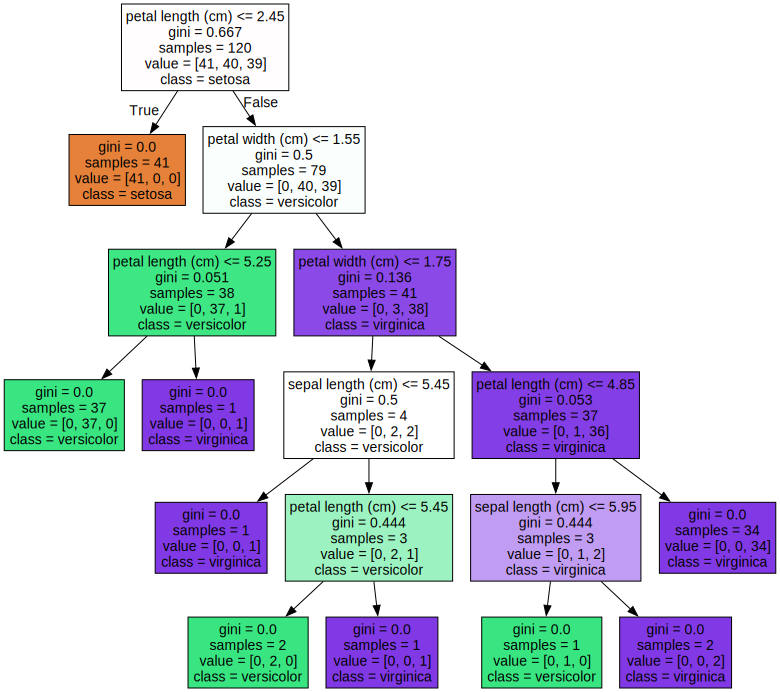

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

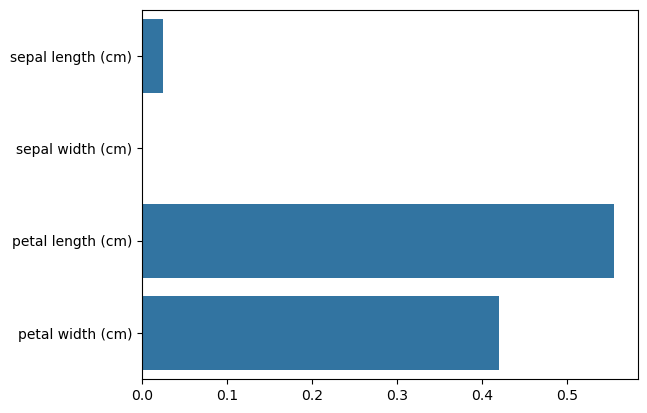

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))


sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

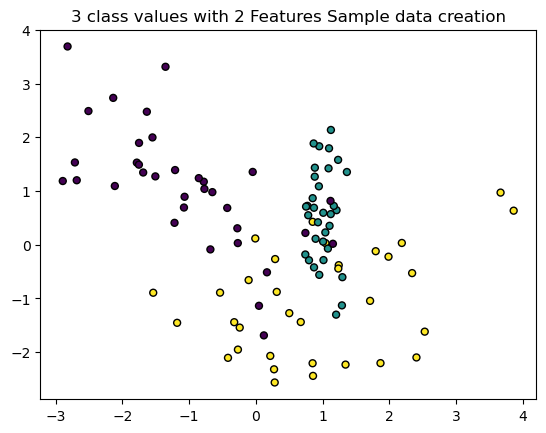

In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [18]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

##제공 소스 코드 활용

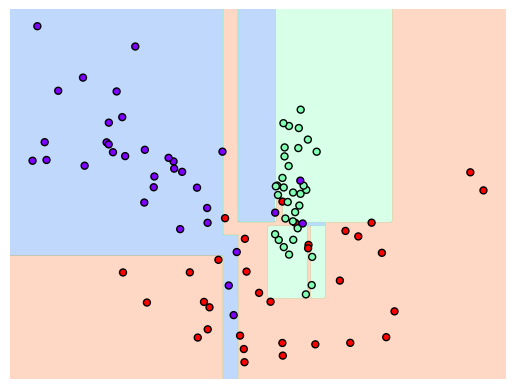

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

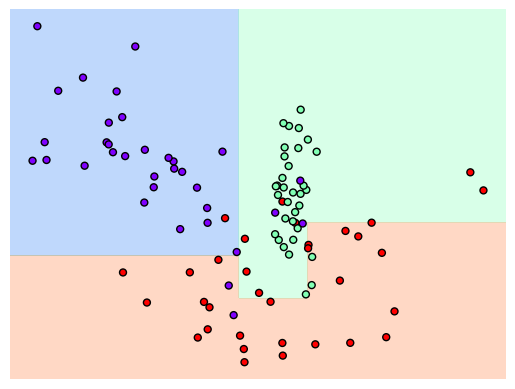

In [22]:
dt_clf2 = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf2, X_features, y_labels)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv(r"C:\Users\rud92\0.ESAA\features.txt", sep='\s+', header=None, names=['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()
print("전체 피처명에서 10개만 추출 : ", feature_name[:10])

전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [30]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] >1].count())  ##중복된 피처 명 찾기 
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [32]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [42]:
import pandas as pd

def get_human_dataset():
    feature_name_df =pd.read_csv(r"C:\Users\rud92\0.ESAA\features.txt", sep ='\s+', header=None, names=['column_index', 'column_name'])

    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    X_train = pd.read_csv(r"C:\Users\rud92\0.ESAA\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt", sep='\s+', names=feature_name) 
    X_test = pd.read_csv(r"C:\Users\rud92\0.ESAA\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt", sep='\s+', names=feature_name)

    y_train =pd.read_csv(r"C:\Users\rud92\0.ESAA\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt", sep='\s+', header=None, names=['action']) 
    y_test = pd.read_csv(r"C:\Users\rud92\0.ESAA\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt", sep='\s+', header=None, names=['action'])
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))


print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [53]:
## 하이퍼 파라미터 값 변경하면서 정확도 비교

from sklearn.model_selection import GridSearchCV

params={'max_depth' : [6,8,10,12,16,20,24], 'min_samples_split':[16]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [55]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [59]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8551
max_depth = 8 정확도 : 0.8717
max_depth = 10 정확도 : 0.8599
max_depth = 12 정확도 : 0.8571
max_depth = 16 정확도 : 0.8599
max_depth = 20 정확도 : 0.8565
max_depth = 24 정확도 : 0.8565


In [63]:
params = {'max_depth':[8,12,16,20], 'min_samples_split':[16,24]}

grid_cv2 = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv2.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 : {0:.4f}'.format(grid_cv2.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv2.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 : 0.8549
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [65]:
best_df_clf = grid_cv2.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)

print("결정 트리 예측 정확도: {0:.4f}".format(accuracy))

결정 트리 예측 정확도: 0.8717


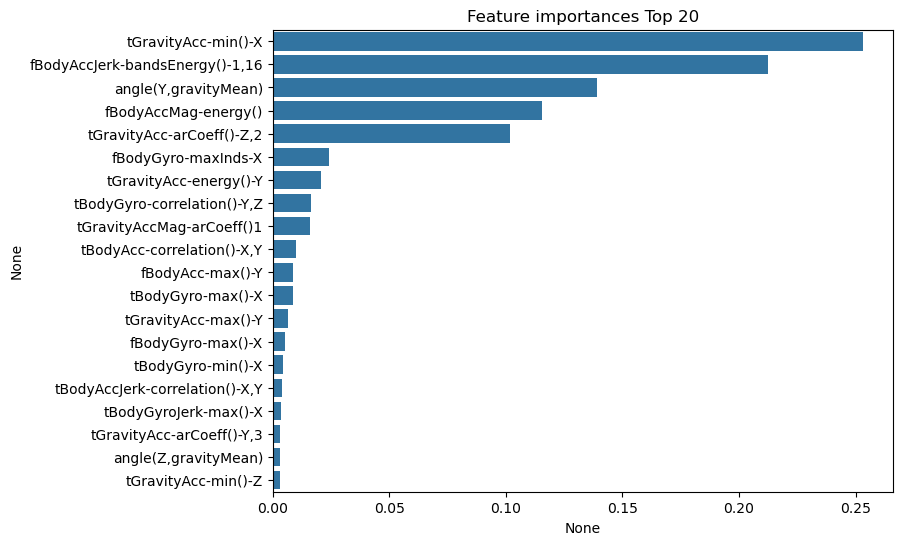

In [67]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()